Now we will be using KNN as our model

In [48]:
import pandas as pd
import numpy as np
from io import StringIO


In [49]:
Train= pd.read_csv("Data/train.csv")
Test= pd.read_csv("Data/test.csv")

Since we have identified some columns that are not important, and lead irrelavancy, we will drop them from both

In [50]:
Train.drop('gender', axis=1, inplace=True)
Test.drop('gender', axis=1, inplace=True)
Train.drop('apache_3j_bodysystem', axis=1, inplace=True)
Test.drop('apache_3j_bodysystem', axis=1, inplace=True)


Next we will normlaise values that have peak on some values and none on others

In [24]:
# Calculate the proportions
prop_death_given_surgery = Train[(Train['elective_surgery'] == 1) & (Train['hospital_death'] == 1)].shape[0] / Train[Train['elective_surgery'] == 1].shape[0]
prop_death_given_no_surgery = Train[(Train['elective_surgery'] == 0) & (Train['hospital_death'] == 1)].shape[0] / Train[Train['elective_surgery'] == 0].shape[0]

# Create new feature
Train['prob'] = np.where(Train['elective_surgery'] == 1, prop_death_given_surgery, prop_death_given_no_surgery)
#since eletive surgery is already 0-1 prob is not of any use
#can we add a legend of hosital_death on train['prob'] and identify which is elective surger 1 and 0
# Train['prob'] = np.where(Train['elective_surgery'] == 1, prop_death_given_surgery, prop_death_given_no_surgery)
#add legende of hospital_death on train['prob'] and identify which is elective surger 1 and 0
Train['prob']
#drop this
Train.drop('prob', axis=1, inplace=True)



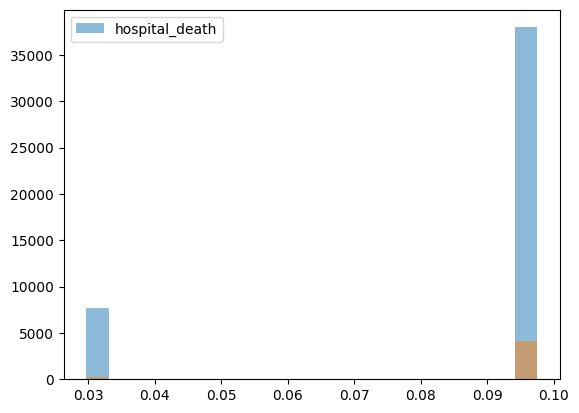

In [19]:
import matplotlib.pyplot as plt

# create histogram of Train['prob'] and add legend of hospital_death
for hd in Train['hospital_death'].unique():
    plt.hist(Train[Train['hospital_death']==hd]['prob'], bins=20, alpha=0.5, label=f'Hospital Death: {hd}')
plt.legend(['hospital_death'])

plt.show()


No difference by normalising it

Normalisng pre_icu_los_days  times

(array([7.7000e+01, 3.0659e+04, 8.9130e+03, 2.1970e+03, 1.8280e+03,
        1.3580e+03, 1.1790e+03, 1.1070e+03, 8.8500e+02, 6.7900e+02,
        4.6400e+02, 2.5900e+02, 1.9700e+02, 8.7000e+01, 5.4000e+01,
        2.5000e+01, 1.9000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([-0.28030196, -0.04393867,  0.19242462,  0.42878791,  0.6651512 ,
         0.90151449,  1.13787778,  1.37424107,  1.61060436,  1.84696765,
         2.08333094,  2.31969423,  2.55605752,  2.79242081,  3.0287841 ,
         3.26514739,  3.50151068,  3.73787397,  3.97423726,  4.21060055,
         4.44696384]),
 <BarContainer object of 20 artists>)

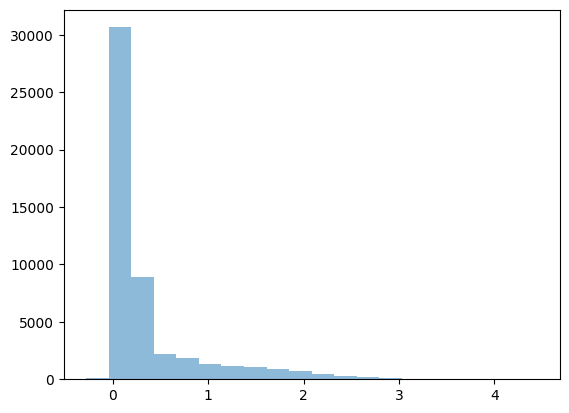

In [51]:
#normalise Train['pre_icu_los_days']
Train['pre_icu_los_days'] = np.log1p(Train['pre_icu_los_days'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Train['pre_icu_los_days'], bins=20, alpha=0.5, label='Pre ICU LOS Days')


(array([6.4000e+01, 2.0593e+04, 3.6980e+03, 1.3520e+03, 9.2300e+02,
        8.6700e+02, 7.9800e+02, 6.2200e+02, 4.3200e+02, 2.7100e+02,
        1.9100e+02, 8.6000e+01, 5.4000e+01, 2.6000e+01, 1.1000e+01,
        6.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.28768207, -0.01951086,  0.24866036,  0.51683157,  0.78500279,
         1.053174  ,  1.32134522,  1.58951643,  1.85768765,  2.12585886,
         2.39403008,  2.66220129,  2.93037251,  3.19854372,  3.46671494,
         3.73488615,  4.00305737,  4.27122858,  4.5393998 ,  4.80757101,
         5.07574223]),
 <BarContainer object of 20 artists>)

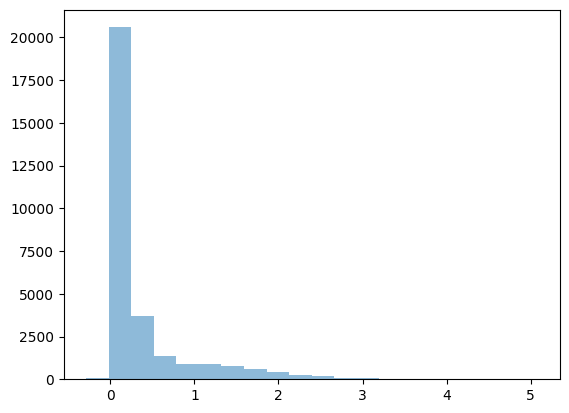

In [52]:
#normalise Train['pre_icu_los_days']
Test['pre_icu_los_days'] = np.log1p(Test['pre_icu_los_days'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Test['pre_icu_los_days'], bins=20, alpha=0.5, label='Pre ICU LOS Days')


normalsied apache_2_diagnosis

(array([ 3628.,  5660., 12363.,  7674.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,  2529.,  2284.,     0.,     0.,
            0.,     0.,     0., 15586.]),
 array([4.62497281, 4.68039124, 4.73580966, 4.79122808, 4.84664651,
        4.90206493, 4.95748335, 5.01290178, 5.0683202 , 5.12373862,
        5.17915705, 5.23457547, 5.28999389, 5.34541231, 5.40083074,
        5.45624916, 5.51166758, 5.56708601, 5.62250443, 5.67792285,
        5.73334128]),
 <BarContainer object of 20 artists>)

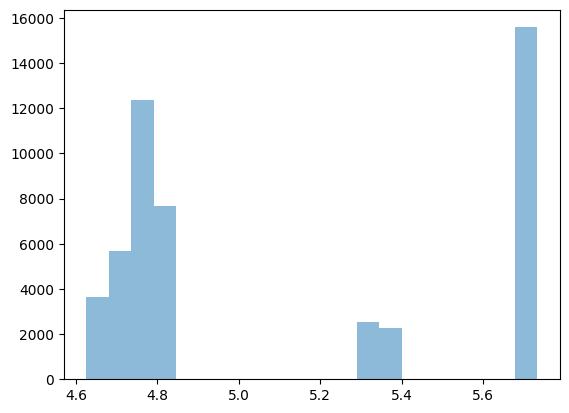

In [53]:
#simialrly normalise apache_2_diagnosis
Train['apache_2_diagnosis'] = np.log1p(Train['apache_2_diagnosis'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Train['apache_2_diagnosis'], bins=20, alpha=0.5, label='apache_2_diagnosis')


(array([2292., 3426., 7471., 4570.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 1483., 1337.,    0.,    0.,    0.,    0.,
           0., 9241.]),
 array([4.62497281, 4.68039124, 4.73580966, 4.79122808, 4.84664651,
        4.90206493, 4.95748335, 5.01290178, 5.0683202 , 5.12373862,
        5.17915705, 5.23457547, 5.28999389, 5.34541231, 5.40083074,
        5.45624916, 5.51166758, 5.56708601, 5.62250443, 5.67792285,
        5.73334128]),
 <BarContainer object of 20 artists>)

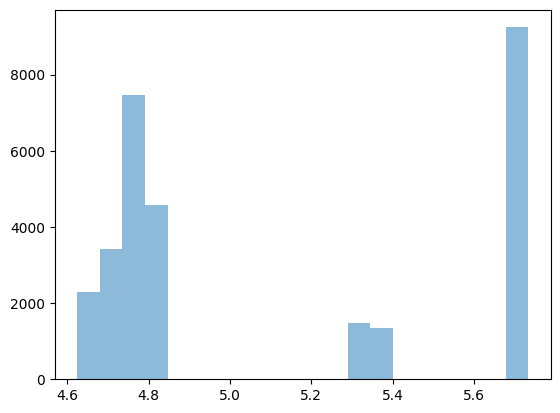

In [54]:
#simialrly normalise apache_2_diagnosis
Test['apache_2_diagnosis'] = np.log1p(Test['apache_2_diagnosis'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Test['apache_2_diagnosis'], bins=20, alpha=0.5, label='apache_2_diagnosis')


(array([ 133.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 7021., 3584., 1950., 3315., 5233., 3380.,
        3915., 1422.]),
 array([0.00995033, 0.39431002, 0.7786697 , 1.16302938, 1.54738907,
        1.93174875, 2.31610844, 2.70046812, 3.08482781, 3.46918749,
        3.85354718, 4.23790686, 4.62226655, 5.00662623, 5.39098592,
        5.7753456 , 6.15970529, 6.54406497, 6.92842465, 7.31278434,
        7.69714402]),
 <BarContainer object of 20 artists>)

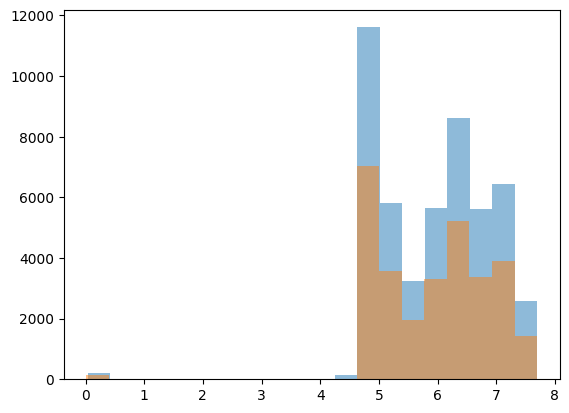

In [55]:
#do for apache_3j_diagnosis as well for both train and test
Train['apache_3j_diagnosis'] = np.log1p(Train['apache_3j_diagnosis'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Train['apache_3j_diagnosis'], bins=20, alpha=0.5, label='apache_3j_diagnosis')
#do for test as well
Test['apache_3j_diagnosis'] = np.log1p(Test['apache_3j_diagnosis'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Test['apache_3j_diagnosis'], bins=20, alpha=0.5, label='apache_3j_diagnosis')


(array([ 375.,  714.,  843., 2534., 3158., 3740., 4999., 4311., 2713.,
        2016., 1282., 1149.,  779.,  372.,  280.,  213.,  144.,  101.,
          65.,  210.]),
 array([2.7080502 , 2.79927767, 2.89050513, 2.98173259, 3.07296006,
        3.16418752, 3.25541499, 3.34664245, 3.43786992, 3.52909738,
        3.62032485, 3.71155231, 3.80277978, 3.89400724, 3.98523471,
        4.07646217, 4.16768963, 4.2589171 , 4.35014456, 4.44137203,
        4.53259949]),
 <BarContainer object of 20 artists>)

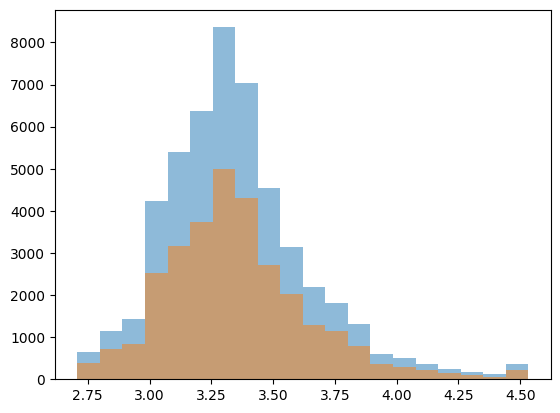

In [56]:
#do for resprate_apache as well
Train['d1_resprate_max'] = np.log1p(Train['d1_resprate_max'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Train['d1_resprate_max'], bins=20, alpha=0.5, label='d1_resprate_max')
#do for test as well
Test['d1_resprate_max'] = np.log1p(Test['d1_resprate_max'])
#make hsitogram of normlaised Train['pre_icu_los_days']
plt.hist(Test['d1_resprate_max'], bins=20, alpha=0.5, label='d1_resprate_max')

In [60]:
#do for temp_apache as well
Train['temp_apache'] = np.log1p(Train['temp_apache'])
#do for test as well
Test['temp_apache'] = np.log1p(Test['temp_apache'])



In [61]:
#do foor d1_resprate_max as well
Train['d1_resprate_max'] = np.log1p(Train['d1_resprate_max'])
#do for test as well
Test['d1_resprate_max'] = np.log1p(Test['d1_resprate_max'])

In [62]:
#do for d1_temp_min
Train['d1_temp_min'] = np.log1p(Train['d1_temp_min'])
#do for test as well
Test['d1_temp_min'] = np.log1p(Test['d1_temp_min'])

In [63]:
#do foe h1_spo2_max
Train['h1_spo2_max'] = np.log1p(Train['h1_spo2_max'])
#do for test as well
Test['h1_spo2_max'] = np.log1p(Test['h1_spo2_max'])

In [64]:
#do for h1_spo2_min
Train['h1_spo2_min'] = np.log1p(Train['h1_spo2_min'])
#do for test as well
Test['h1_spo2_min'] = np.log1p(Test['h1_spo2_min'])

In [65]:
#do for d1_glucose_max
Train['d1_glucose_max'] = np.log1p(Train['d1_glucose_max'])
#do for test as well
Test['d1_glucose_max'] = np.log1p(Test['d1_glucose_max'])

In [67]:
#for all binary columns we will apply knn imputer for missing values
#first we will create a list of all binary columns
binary_cols = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis']
#now we will apply knn imputer on these columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
Train[binary_cols] = imputer.fit_transform(Train[binary_cols])
Test[binary_cols] = imputer.fit_transform(Test[binary_cols])


In [71]:
#next for all numeric columns we will apply mean imputer for missing values
#first we will create a list of all numeric columns
#make a datafram for numeric values
# next for all numeric columns we will apply mean imputer for missing values
# first we will create a list of all numeric columns excluding binary_cols
numeric_cols = [col for col in Train.select_dtypes(include=[np.number]).columns if col not in binary_cols]
# make a dataframe for numeric values
numeric_data = Train[numeric_cols]


In [78]:
numeric_colsTest = [col for col in Test.select_dtypes(include=[np.number]).columns if col not in binary_cols]
# make a dataframe for numeric values
numeric_dataTest = Test[numeric_colsTest]


In [80]:
#now run mean imputer on numeric_data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Train[numeric_cols] = imputer.fit_transform(Train[numeric_cols])
#do same for test
Test[numeric_colsTest] = imputer.fit_transform(Test[numeric_colsTest])

In [83]:
categorical_data = Train.select_dtypes(exclude=[np.number])
categorical_dataTest = Test.select_dtypes(exclude=[np.number])

In [84]:
#print categorical_data
categorical_data.head()

,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_2_bodysystem
0,Caucasian,Floor,transfer,Med-Surg ICU,Metabolic
1,African American,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular
2,Caucasian,Floor,admit,MICU,Respiratory
3,Caucasian,Accident & Emergency,admit,Med-Surg ICU,Neurologic
4,Caucasian,Accident & Emergency,admit,CSICU,Cardiovascular


In [85]:
#fill in the cateogrical data using mode iputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
Train[categorical_data.columns] = imputer.fit_transform(Train[categorical_data.columns])
#do same for test
Test[categorical_dataTest.columns] = imputer.fit_transform(Test[categorical_dataTest.columns])

In [88]:
#do one hot encoding for all categorical columns
#first create a list of all categorical columns
categorical_cols = categorical_data.columns
#now do one hot encoding
Train = pd.get_dummies(Train, columns=categorical_cols)
#do same for test
Test = pd.get_dummies(Test, columns=categorical_dataTest.columns)


In [128]:
X = Train.loc[:, Train.columns != 'hospital_death']
y = Train[['hospital_death']]

In [129]:
#now i want to run knearest neightour machine learning model on this prepared data
#first we will split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [130]:
def fit_model(model, model_name):
    model.fit(X_train,y_train)
    md_probs = model.predict_proba(X_test)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(y_test, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(y_test, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Scaled k-NN11  :  0.8324955350332386


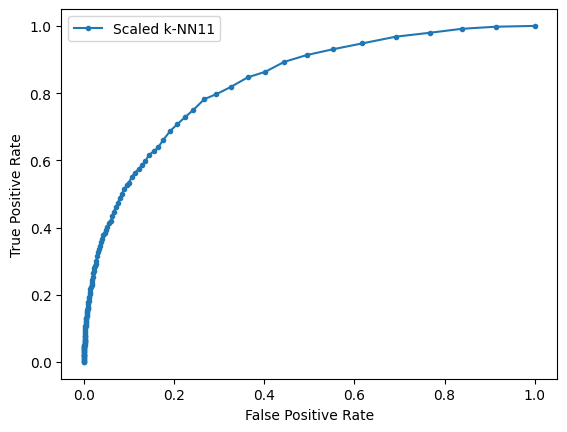

In [178]:
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
# kn = KNeighborsClassifier(n_neighbors=5)
# fit_model(kn, "k-NN")

# pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
# fit_model(pipe_kn, "Scaled k-NN")

# kn8 = KNeighborsClassifier(n_neighbors=8)
# fit_model(kn8, "k-NN8")

# pipe_kn8 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=8))])
# fit_model(pipe_kn8, "Scaled k-NN8")

# kn3 = KNeighborsClassifier(n_neighbors=3)
# fit_model(kn3, "k-NN3")

# pipe_kn3 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=3))])
# fit_model(pipe_kn3, "Scaled k-NN3")

# kn11 = KNeighborsClassifier(n_neighbors=100)
# fit_model(kn11, "k-NN11")

pipe_kn11 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=200))])
fit_model(pipe_kn11, "Scaled k-NN11")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [171]:
#predict using pipe_kn11
predictions = kn11.predict(Test)
# y_pred = pd.DataFrame(y_pred)
# y_pred.to_csv('y_pred.csv')
predictions


array([0., 0., 0., ..., 0., 0., 0.])

In [172]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictionsknn.csv', index=False)

In [119]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# Fit the model on the training data
reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
reg.fit(X, y)

# Make predictions on the test data
# Note: You should preprocess your test data in the same way as your training data
X_test = Test  # Replace with your test features
predictions = reg.predict(X_test)

# Print the predictions
print(predictions)

C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.   0.54 0.07 ... 0.01 0.   0.03]


In [120]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

Depth 5 Split 2  :  0.6378767851829622


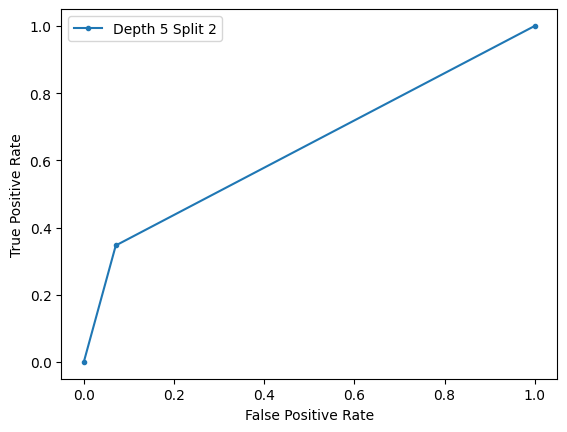

In [164]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dt_5_2 = DecisionTreeClassifier(max_depth=1500, min_samples_split= 2)  
fit_model(dt_5_2, "Depth 5 Split 2") #BEST

# dt_7_2 = DecisionTreeClassifier(max_depth=7)  
# fit_model(dt_7_2, "Depth 7 Split 2") 

# dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
# fit_model(dt_5_5, "Depth 5 Split 5") #BEST

# dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
# fit_model(dt_7_5, "Depth 7 Split 5") 

# dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
# fit_model(dt_3_2, "Depth 3 Split 2") 

# dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
# fit_model(dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [165]:
#predicitng using grid searches best model
hospital_death = dt_5_2.predict(Test)



In [166]:
hospital_death

array([0., 1., 1., ..., 0., 0., 0.])

In [167]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)